# Quais fatores econômicos ou sociais lavam a um maior sucesso eleitoral dos candidatos?

### Datasets Utilizados
* Candidatos
* Eleições
* Resultados de Eleições

## Importando Bibliotecas

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

### Utils

In [275]:
def to_percent(y, position):
    return f'{y * 100:.0f}%'

## Dados

### Candidatos

In [276]:
candidatos_df = pd.read_parquet('datasets/consulta_cand_2022/consulta_cand_2022_RS.parquet')

candidatos_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA_ELEICAO,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,28/09/2024,03:37:22,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,8,SUPERIOR COMPLETO,9,DIVORCIADO(A),1,BRANCA,102,ARQUITETO,5,SUPLENTE
1,28/09/2024,03:37:22,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,102,ARQUITETO,5,SUPLENTE
2,28/09/2024,03:37:22,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,117,FARMACÊUTICO,5,SUPLENTE
3,28/09/2024,03:37:22,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,4,NÃO ELEITO
4,28/09/2024,03:37:22,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,5,SUPLENTE


### Removendo colunas desnecessárias

In [277]:
candidatos_df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [278]:
CANDIDATOS_FEATURES = [
    'NM_CANDIDATO',
    'DS_CARGO',
    'NR_TURNO',
    'SG_PARTIDO',
    'SQ_CANDIDATO',
    'DT_NASCIMENTO',
    # variáveis categóricas interessantes
    'DS_GENERO',
    'DS_GRAU_INSTRUCAO',
    'DS_ESTADO_CIVIL',
    'DS_COR_RACA',
    'DS_OCUPACAO',
    'DS_SIT_TOT_TURNO',
]

In [279]:
candidatos = candidatos_df[CANDIDATOS_FEATURES]

### Despesas Contratadas Candidatos

Gastos de um candidato com sua campanha eleitoral.

In [280]:
despessas_contratadas_df = pd.read_parquet('datasets/prestacao_contas_2022/despesas_contratadas_candidatos_2022_RS.parquet')

In [281]:
despessas_contratadas_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,SG_PARTIDO_FORNECEDOR,NM_PARTIDO_FORNECEDOR,DS_TIPO_DOCUMENTO,NR_DOCUMENTO,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,SQ_DESPESA,DT_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,20/10/2024,01:02:17,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Outro,SN,20010000,Despesas com pessoal,49665494,16/08/2022,COORDENADOR LOCAL - CAIÇARA,"1000,00"
1,20/10/2024,01:02:17,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Outro,182,20800000,Atividades de militância e mobilização de rua,51394848,05/09/2022,MOBILIZAÇÃO DE RUA,"840,00"
2,20/10/2024,01:02:17,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Recibo,01,20010000,Despesas com pessoal,50361908,17/08/2022,SERVIÇO PRESTADO NA CAMPANHA ELEITORAL,"4000,00"
3,20/10/2024,01:02:17,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Recibo,01,20010000,Despesas com pessoal,50362174,17/08/2022,PRESTAÇÃO DE SERVIÇO NA CAMPANHA,"4000,00"
4,20/10/2024,01:02:17,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Outro,SN,20010000,Despesas com pessoal,47829421,01/09/2022,ASSISTENTE DE CAMPANHA ELEITORAL,"1000,00"


### Removendo colunas desnecessárias

In [282]:
despessas_contratadas_df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'SG_UE', 'NM_UE', 'NR_CNPJ_PRESTADOR_CONTA', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NR_CPF_CANDIDATO', 'NR_CPF_VICE_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'CD_TIPO_FORNECEDOR', 'DS_TIPO_FORNECEDOR',
       'CD_CNAE_FORNECEDOR', 'DS_CNAE_FORNECEDOR', 'NR_CPF_CNPJ_FORNECEDOR',
       'NM_FORNECEDOR', 'NM_FORNECEDOR_RFB', 'CD_ESFERA_PART_FORNECEDOR',
       'DS_ESFERA_PART_FORNECEDOR', 'SG_UF_FORNECEDOR',
       'CD_MUNICIPIO_FORNECEDOR', 'NM_MUNICIPIO_FORNECEDOR',
       'SQ_CANDIDATO_FORNECEDOR', 'NR_CANDIDATO_FORNECEDOR',
       'CD_CARGO_FORNECEDOR', 'DS_CARGO_FORNECEDOR', 'NR_PARTIDO_FORNECEDOR',
       'SG_PARTIDO_FORNECEDOR', 'NM_PARTIDO_FORNECEDOR', 'DS_TIPO_DOCUMENTO',
     

In [283]:
DESPESAS_CONTRATA_FEATURES = [
    'SQ_CANDIDATO',
    'NR_PARTIDO',
    'SG_PARTIDO',
    'DS_TIPO_FORNECEDOR',
    'DS_ESFERA_PART_FORNECEDOR',
    'DS_ORIGEM_DESPESA',
    'DT_DESPESA',
    'DS_DESPESA',
    'VR_DESPESA_CONTRATADA'
]



In [284]:
despesas_contratadas = despessas_contratadas_df[DESPESAS_CONTRATA_FEATURES]

### Despesas Pagas Candidatos

O que de fato foi pago pelo candidato de todas suas despesas eleitorais.

In [285]:
despessas_pagas_df = pd.read_parquet('datasets/prestacao_contas_2022/despesas_pagas_candidatos_2022_RS.parquet')
despessas_pagas_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,DS_ORIGEM_DESPESA,CD_NATUREZA_DESPESA,DS_NATUREZA_DESPESA,CD_ESPECIE_RECURSO,DS_ESPECIE_RECURSO,SQ_DESPESA,SQ_PARCELAMENTO_DESPESA,DT_PAGTO_DESPESA,DS_DESPESA,VR_PAGTO_DESPESA
0,20/10/2024,01:00:55,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Energia elétrica,1,Financeiro,8,Débito em conta,49284289,35128972,11/10/2022,ENERGIA ELÉTRICA,"21,90"
1,20/10/2024,01:00:55,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Energia elétrica,1,Financeiro,6,Boleto de cobrança,51281924,37550641,11/10/2022,ENERGIA ELETRICA,"28,47"
2,20/10/2024,01:00:55,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Energia elétrica,1,Financeiro,6,Boleto de cobrança,50303424,36374369,07/10/2022,ENERGIA ELETRICA,"82,24"
3,20/10/2024,01:00:55,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,2,Final,...,Energia elétrica,1,Financeiro,1,Transferência eletrônica,51280720,37549048,10/11/2022,ENERGIA ELETRICA CONFORME CONTRATO,"3899,95"
4,20/10/2024,01:00:55,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,2,Final,...,Energia elétrica,1,Financeiro,1,Transferência eletrônica,51280974,37548830,14/10/2022,ENERGIA ELETRICA CONFORME CONTRATO,"3006,40"


### Removendo colunas desnecessárias

In [286]:

despessas_pagas_df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'DS_TIPO_DOCUMENTO', 'NR_DOCUMENTO', 'CD_FONTE_DESPESA',
       'DS_FONTE_DESPESA', 'CD_ORIGEM_DESPESA', 'DS_ORIGEM_DESPESA',
       'CD_NATUREZA_DESPESA', 'DS_NATUREZA_DESPESA', 'CD_ESPECIE_RECURSO',
       'DS_ESPECIE_RECURSO', 'SQ_DESPESA', 'SQ_PARCELAMENTO_DESPESA',
       'DT_PAGTO_DESPESA', 'DS_DESPESA', 'VR_PAGTO_DESPESA'],
      dtype='object')

In [287]:
DESPESAS_PAGAS_FEATURES = [
    'SQ_PRESTADOR_CONTAS',
    'DT_PAGTO_DESPESA',
    'DS_DESPESA',
    'VR_PAGTO_DESPESA'
]

In [288]:
despesas_pagas = despessas_pagas_df[DESPESAS_PAGAS_FEATURES]

### Resultados Eleições

Contagem dos votos de cada candidato no boletim de urna.

In [289]:
resultados_df = pd.read_parquet('datasets/boletins_urna_2022/bweb_1t_RS_051020221321.parquet')

In [290]:
resultados_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1
1,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1
2,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1
3,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1
4,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1


### Removendo colunas desnecessárias

In [291]:
resultados_df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEITORES_BIOMETRIA_NH', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA'],
      dtype='object')

In [292]:
RESULTADOS_FEATURES = [
    'NR_TURNO',
    'CD_ELEICAO',
    'NM_VOTAVEL',
    'NR_VOTAVEL',
    'DS_CARGO_PERGUNTA',
    'SG_PARTIDO',
    'NR_PARTIDO',
    'NM_MUNICIPIO',
    'SG_UF',
    'NR_ZONA',
    'NR_SECAO',
    'QT_APTOS',
    'QT_VOTOS',
    'QT_ABSTENCOES'
]

In [293]:
resultados = resultados_df[RESULTADOS_FEATURES]

## Pré-processamento de Dados

### Convertendo colunas de data para datetime

In [294]:
candidatos['DT_NASCIMENTO'] = pd.to_datetime(candidatos['DT_NASCIMENTO'], format='%d/%m/%Y')

/var/folders/l1/vlgl5rzs70n7qrj59y4l3k4h0000gn/T/ipykernel_8695/3837032471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidatos['DT_NASCIMENTO'] = pd.to_datetime(candidatos['DT_NASCIMENTO'], format='%d/%m/%Y')


### Adicionando coluna de idade   

In [295]:
current_date = pd.to_datetime('today')
candidatos['NR_IDADE'] = (current_date - candidatos['DT_NASCIMENTO']).dt.days // 365.25

candidatos.drop(columns=['DT_NASCIMENTO'], inplace=True)

candidatos.head()

/var/folders/l1/vlgl5rzs70n7qrj59y4l3k4h0000gn/T/ipykernel_8695/2777409877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidatos['NR_IDADE'] = (current_date - candidatos['DT_NASCIMENTO']).dt.days // 365.25
/var/folders/l1/vlgl5rzs70n7qrj59y4l3k4h0000gn/T/ipykernel_8695/2777409877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidatos.drop(columns=['DT_NASCIMENTO'], inplace=True)


,NM_CANDIDATO,DS_CARGO,NR_TURNO,SG_PARTIDO,SQ_CANDIDATO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,NR_IDADE
0,FÁBIO JOSÉ ARAÚJO LEAL,DEPUTADO ESTADUAL,1,PDT,210001621322,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ARQUITETO,SUPLENTE,60.0
1,SINARA KUHN,DEPUTADO ESTADUAL,1,PODE,210001596148,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,ARQUITETO,SUPLENTE,44.0
2,FRANCIS SOMENSI,DEPUTADO ESTADUAL,1,REPUBLICANOS,210001601633,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,FARMACÊUTICO,SUPLENTE,46.0
3,EVELIN GARAGNANI,DEPUTADO FEDERAL,1,PROS,210001723177,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO FUNDAMENTAL,NÃO ELEITO,59.0
4,MARIA LUIZA OLIVEIRA LOOSE,DEPUTADO FEDERAL,1,PSB,210001596986,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO FUNDAMENTAL,SUPLENTE,47.0


### Convertando valores nulos para nan

In [296]:
candidatos.replace('#NULO#', np.nan, inplace=True)
despesas_contratadas.replace('#NULO#', np.nan, inplace=True)
despesas_pagas.replace('#NULO#', np.nan, inplace=True)
resultados.replace('#NULO#', np.nan, inplace=True)

/var/folders/l1/vlgl5rzs70n7qrj59y4l3k4h0000gn/T/ipykernel_8695/3875374486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidatos.replace('#NULO#', np.nan, inplace=True)
/var/folders/l1/vlgl5rzs70n7qrj59y4l3k4h0000gn/T/ipykernel_8695/3875374486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  despesas_contratadas.replace('#NULO#', np.nan, inplace=True)
/var/folders/l1/vlgl5rzs70n7qrj59y4l3k4h0000gn/T/ipykernel_8695/3875374486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [297]:
print('Tamanho total da base de candidatos:', candidatos.shape)
print('Tamanho total da base de despesas contratadas:', despesas_contratadas.shape)
print('Tamanho total da base de despesas pagas:', despesas_pagas.shape)
print('Tamanho total da base de resultados:', resultados.shape)

Tamanho total da base de candidatos: (1437, 12)
Tamanho total da base de despesas contratadas: (121880, 9)
Tamanho total da base de despesas pagas: (136329, 4)
Tamanho total da base de resultados: (3898820, 14)


## Análise Exploratória de Dados (EDA)

### Candidatos

In [298]:
candidatos.head()

,NM_CANDIDATO,DS_CARGO,NR_TURNO,SG_PARTIDO,SQ_CANDIDATO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,NR_IDADE
0,FÁBIO JOSÉ ARAÚJO LEAL,DEPUTADO ESTADUAL,1,PDT,210001621322,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ARQUITETO,SUPLENTE,60.0
1,SINARA KUHN,DEPUTADO ESTADUAL,1,PODE,210001596148,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,ARQUITETO,SUPLENTE,44.0
2,FRANCIS SOMENSI,DEPUTADO ESTADUAL,1,REPUBLICANOS,210001601633,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,FARMACÊUTICO,SUPLENTE,46.0
3,EVELIN GARAGNANI,DEPUTADO FEDERAL,1,PROS,210001723177,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO FUNDAMENTAL,NÃO ELEITO,59.0
4,MARIA LUIZA OLIVEIRA LOOSE,DEPUTADO FEDERAL,1,PSB,210001596986,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO FUNDAMENTAL,SUPLENTE,47.0


### Distribuição de Candidatos por Partido

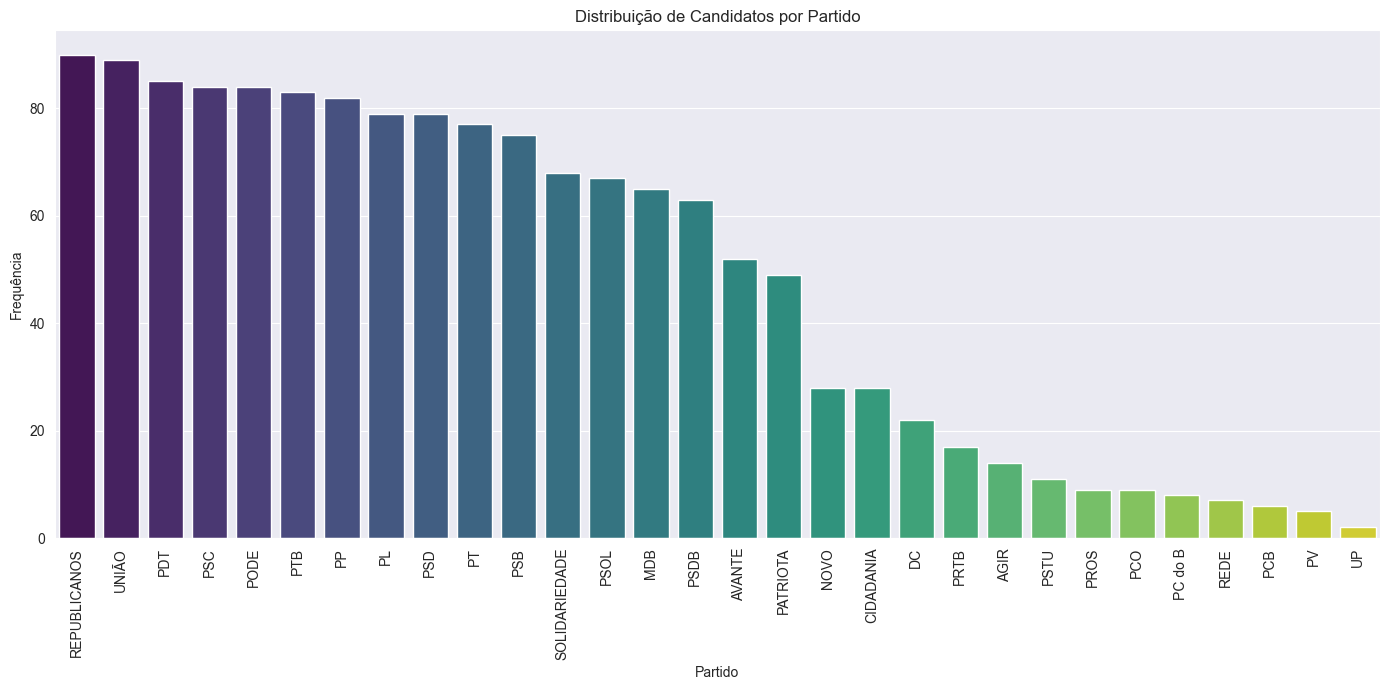

In [299]:
partido_counts = candidatos['SG_PARTIDO'].value_counts().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x=partido_counts.index, y=partido_counts.values, palette='viridis', hue=partido_counts.index)

plt.title('Distribuição de Candidatos por Partido')
plt.xlabel('Partido')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Ocupaçõe mais comuns dentre os candidatos

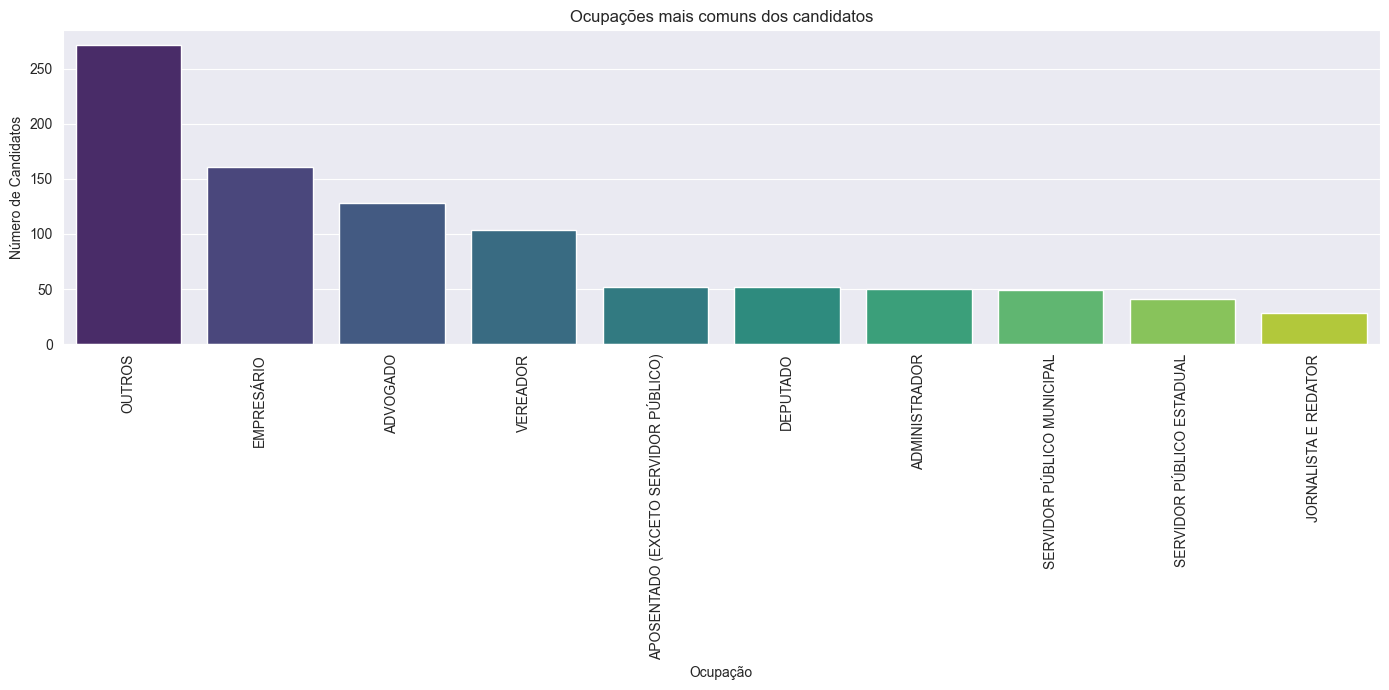

In [300]:
ocupacao_counts = candidatos['DS_OCUPACAO'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x=ocupacao_counts.index, y=ocupacao_counts.values, palette='viridis', hue=ocupacao_counts.index)
plt.title('Ocupações mais comuns dos candidatos')
plt.xlabel('Ocupação')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Distribuição de Idade dos Candidatos

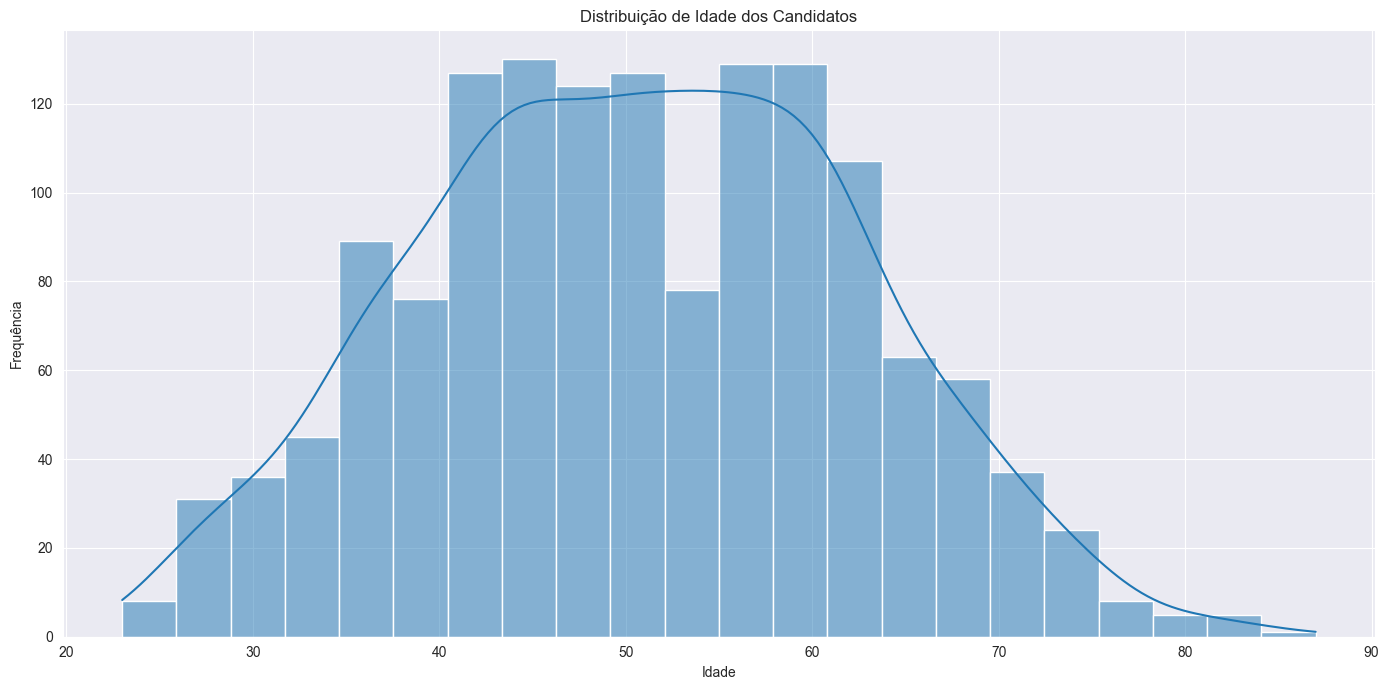

In [301]:
plt.figure(figsize=(14, 7))
sns.histplot(candidatos['NR_IDADE'], kde=True)
plt.title('Distribuição de Idade dos Candidatos')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [302]:
candidatos['NR_IDADE'].describe()

count    1437.000000
mean       50.756437
std        11.691269
min        23.000000
25%        42.000000
50%        51.000000
75%        59.000000
max        87.000000
Name: NR_IDADE, dtype: float64

### Gênero dos Candidatos

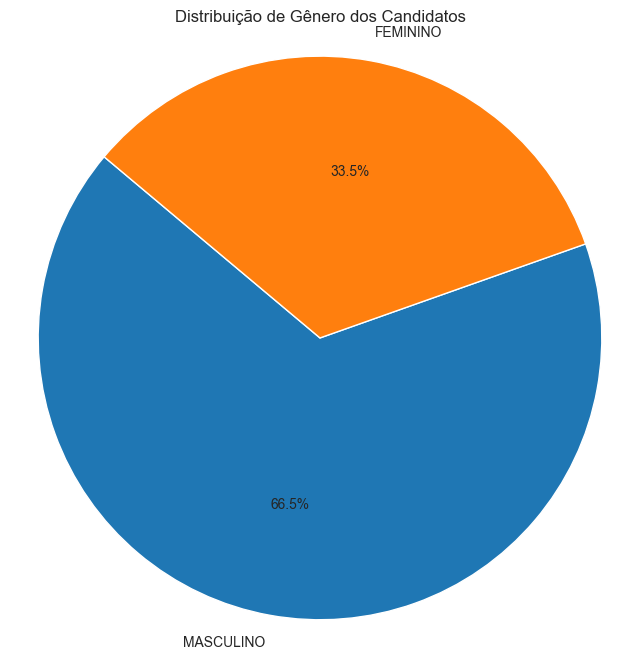

In [303]:
genero_counts = candidatos['DS_GENERO'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Gênero dos Candidatos')
plt.axis('equal')
plt.show()

### Distribuição de Candidatos por Etnia

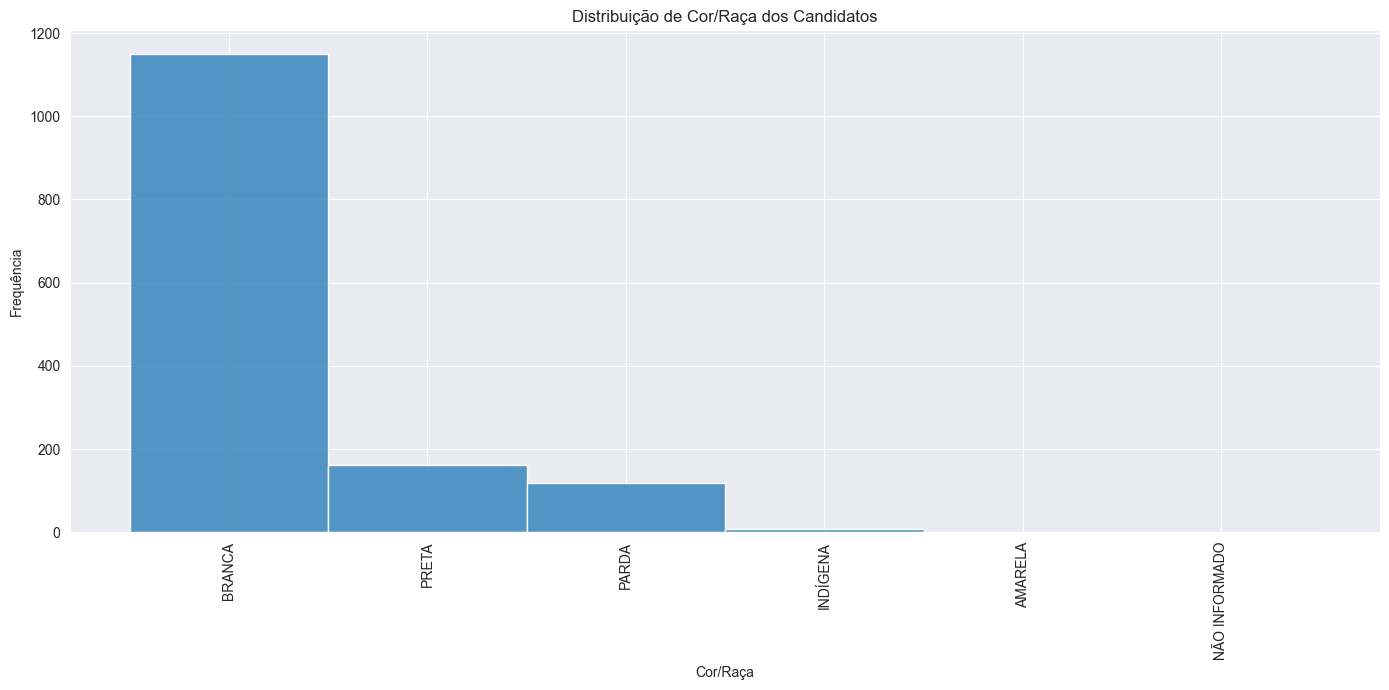

In [304]:
cor_raca_counts = candidatos['DS_COR_RACA'].value_counts()

# Plot the data
plt.figure(figsize=(14, 7))
sns.histplot(candidatos['DS_COR_RACA'], bins=len(cor_raca_counts))
plt.title('Distribuição de Cor/Raça dos Candidatos')
plt.xlabel('Cor/Raça')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Distribuição de Candidatos por Estado Civil

([0, 1, 2, 3, 4],
 [Text(0, 0, 'CASADO(A)'),
  Text(1, 0, 'SOLTEIRO(A)'),
  Text(2, 0, 'DIVORCIADO(A)'),
  Text(3, 0, 'SEPARADO(A) JUDICIALMENTE'),
  Text(4, 0, 'VIÚVO(A)')])

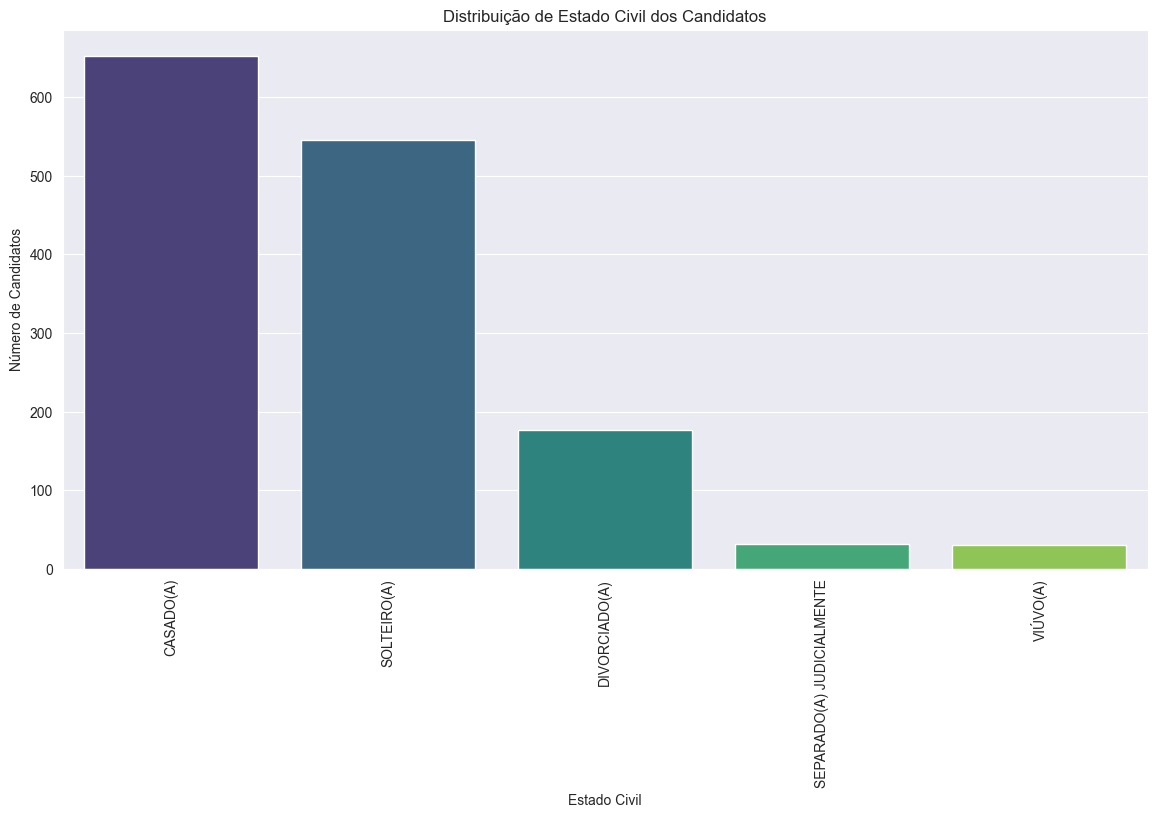

In [305]:
estado_civil_counts = candidatos['DS_ESTADO_CIVIL'].value_counts()

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x=estado_civil_counts.index, y=estado_civil_counts.values, palette='viridis', hue=estado_civil_counts.index)
plt.title('Distribuição de Estado Civil dos Candidatos')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=90)

### Distribuição de Candidatos por Grau de Instrução

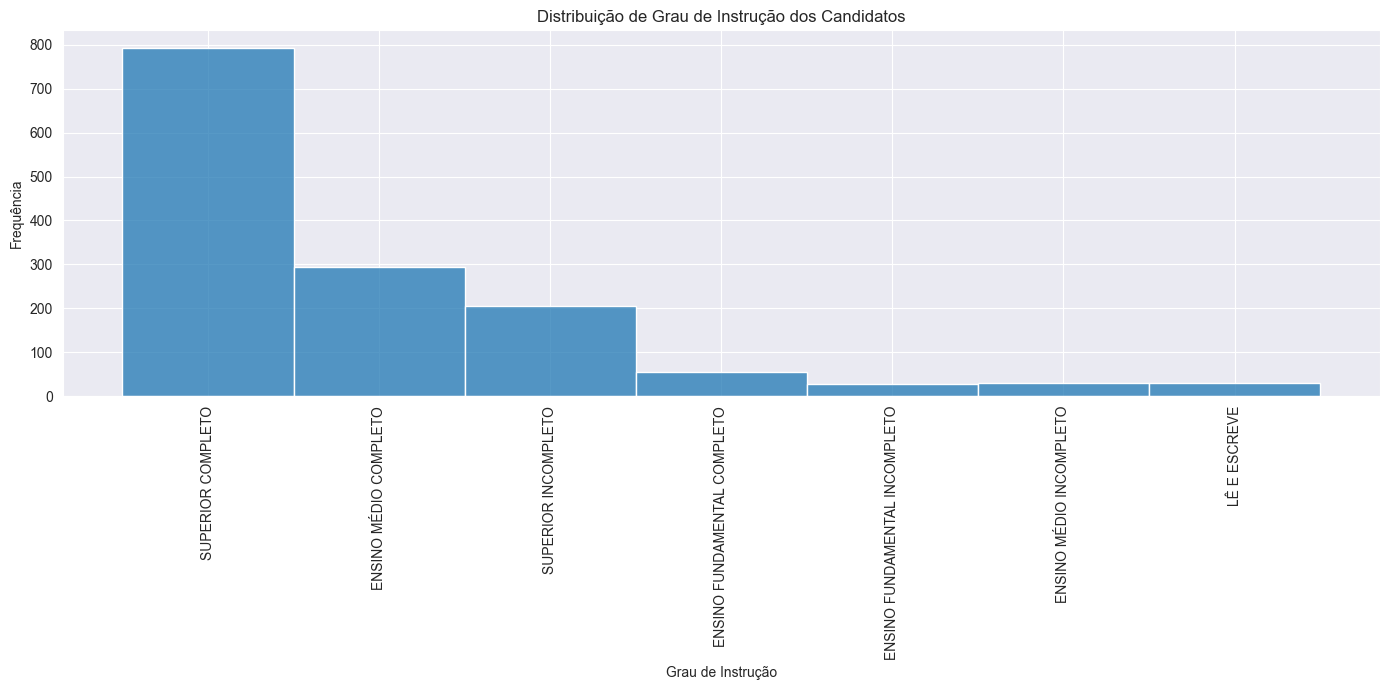

In [306]:
grau_instrucao_counts = candidatos['DS_GRAU_INSTRUCAO'].value_counts()

# Plot the data
plt.figure(figsize=(14, 7))
sns.histplot(candidatos['DS_GRAU_INSTRUCAO'], bins=len(grau_instrucao_counts))
plt.title('Distribuição de Grau de Instrução dos Candidatos')
plt.xlabel('Grau de Instrução')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Situação dos Candidatos

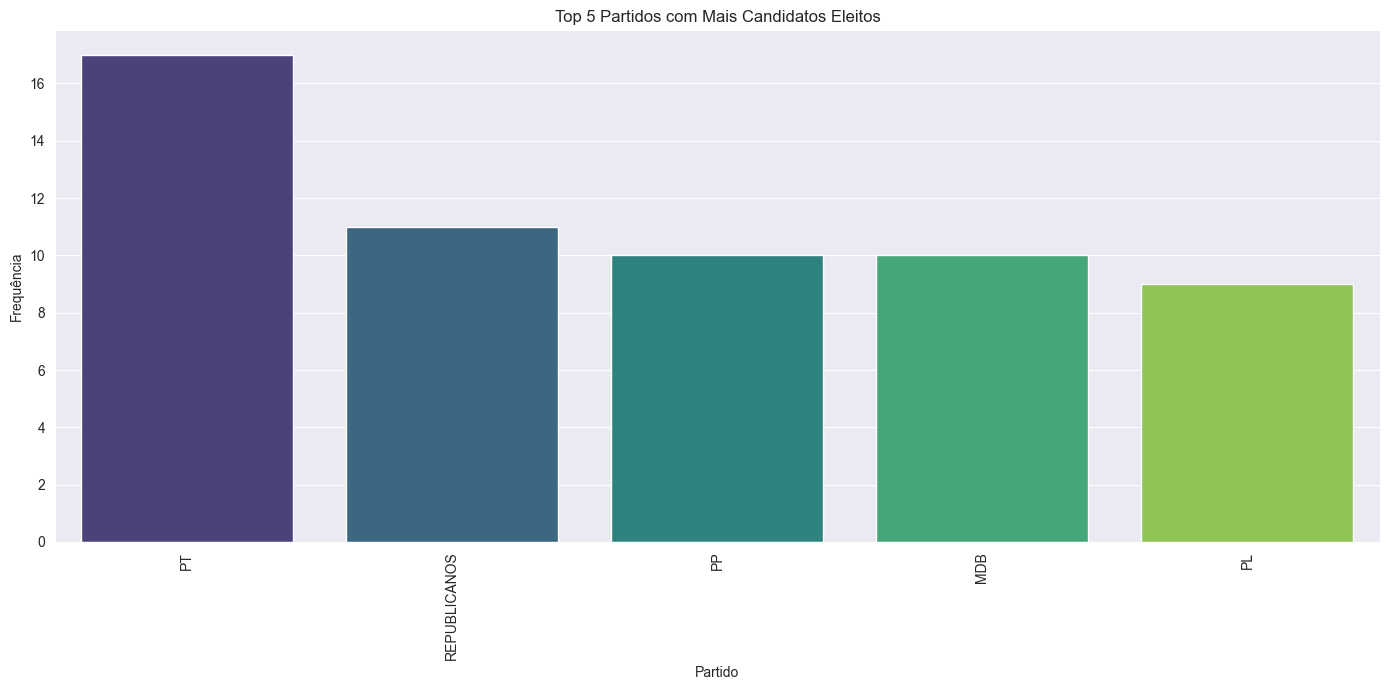

In [307]:
filtered_candidatos = candidatos[candidatos['DS_SIT_TOT_TURNO'].isin(['ELEITO', 'ELEITO POR QP', 'ELEITO POR MÉDIA'])]

# Count the occurrences of each party and sort them
partido_counts = filtered_candidatos['SG_PARTIDO'].value_counts().head(5).sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x=partido_counts.index, y=partido_counts.values, palette='viridis', hue=partido_counts.index)

plt.title('Top 5 Partidos com Mais Candidatos Eleitos')
plt.xlabel('Partido')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Despesas

## Resultados

In [308]:
votos_por_candidato = resultados.groupby(['NR_TURNO', 'CD_ELEICAO','DS_CARGO_PERGUNTA', 'NM_VOTAVEL', 'NR_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

votos_por_candidato.head()

,NR_TURNO,CD_ELEICAO,DS_CARGO_PERGUNTA,NM_VOTAVEL,NR_VOTAVEL,QT_VOTOS
0,1,544,Presidente,Branco,95,129345
1,1,544,Presidente,CIRO GOMES,12,190945
2,1,544,Presidente,CONSTITUINTE EYMAEL,27,885
3,1,544,Presidente,FELIPE D'AVILA,30,40601
4,1,544,Presidente,JAIR BOLSONARO,22,3245023


In [309]:
top_10_votos = votos_por_candidato.sort_values(by='QT_VOTOS', ascending=False).head(10)

top_10_votos

,NR_TURNO,CD_ELEICAO,DS_CARGO_PERGUNTA,NM_VOTAVEL,NR_VOTAVEL,QT_VOTOS
4,1,544,Presidente,JAIR BOLSONARO,22,3245023
5,1,544,Presidente,LULA,13,2806672
1423,1,546,Senador,HAMILTON MOURÃO,100,2593294
1413,1,546,Governador,ONYX LORENZONI,22,2382026
1426,1,546,Senador,OLÍVIO DUTRA,131,2225458
1410,1,546,Governador,EDUARDO LEITE,45,1702815
1409,1,546,Governador,EDEGAR PRETTO,13,1700374
1418,1,546,Senador,ANA AMÉLIA LEMOS,555,966450
1419,1,546,Senador,Branco,95,527127
912,1,546,Deputado Federal,Branco,95,521905


#### Candidatos mais votados

In [310]:
cargos = ["Presidente", "Governador", "Senador", "Deputado Federal", "Deputado Estadual"]

top_10_votos_por_cargo = {}

for cargo in cargos:
    top_10_votos_por_cargo[cargo] = votos_por_candidato[votos_por_candidato['DS_CARGO_PERGUNTA'] == cargo].sort_values(by='QT_VOTOS', ascending=False).head(5)

In [311]:
top_10_votos_por_cargo['Deputado Estadual']


,NR_TURNO,CD_ELEICAO,DS_CARGO_PERGUNTA,NM_VOTAVEL,NR_VOTAVEL,QT_VOTOS
102,1,546,Deputado Estadual,Branco,95,517974
578,1,546,Deputado Estadual,Nulo,96,187899
669,1,546,Deputado Estadual,PT,13,139583
324,1,546,Deputado Estadual,GUSTAVO VICTORINO,10022,112920
444,1,546,Deputado Estadual,LUCIANA GENRO,50000,111126


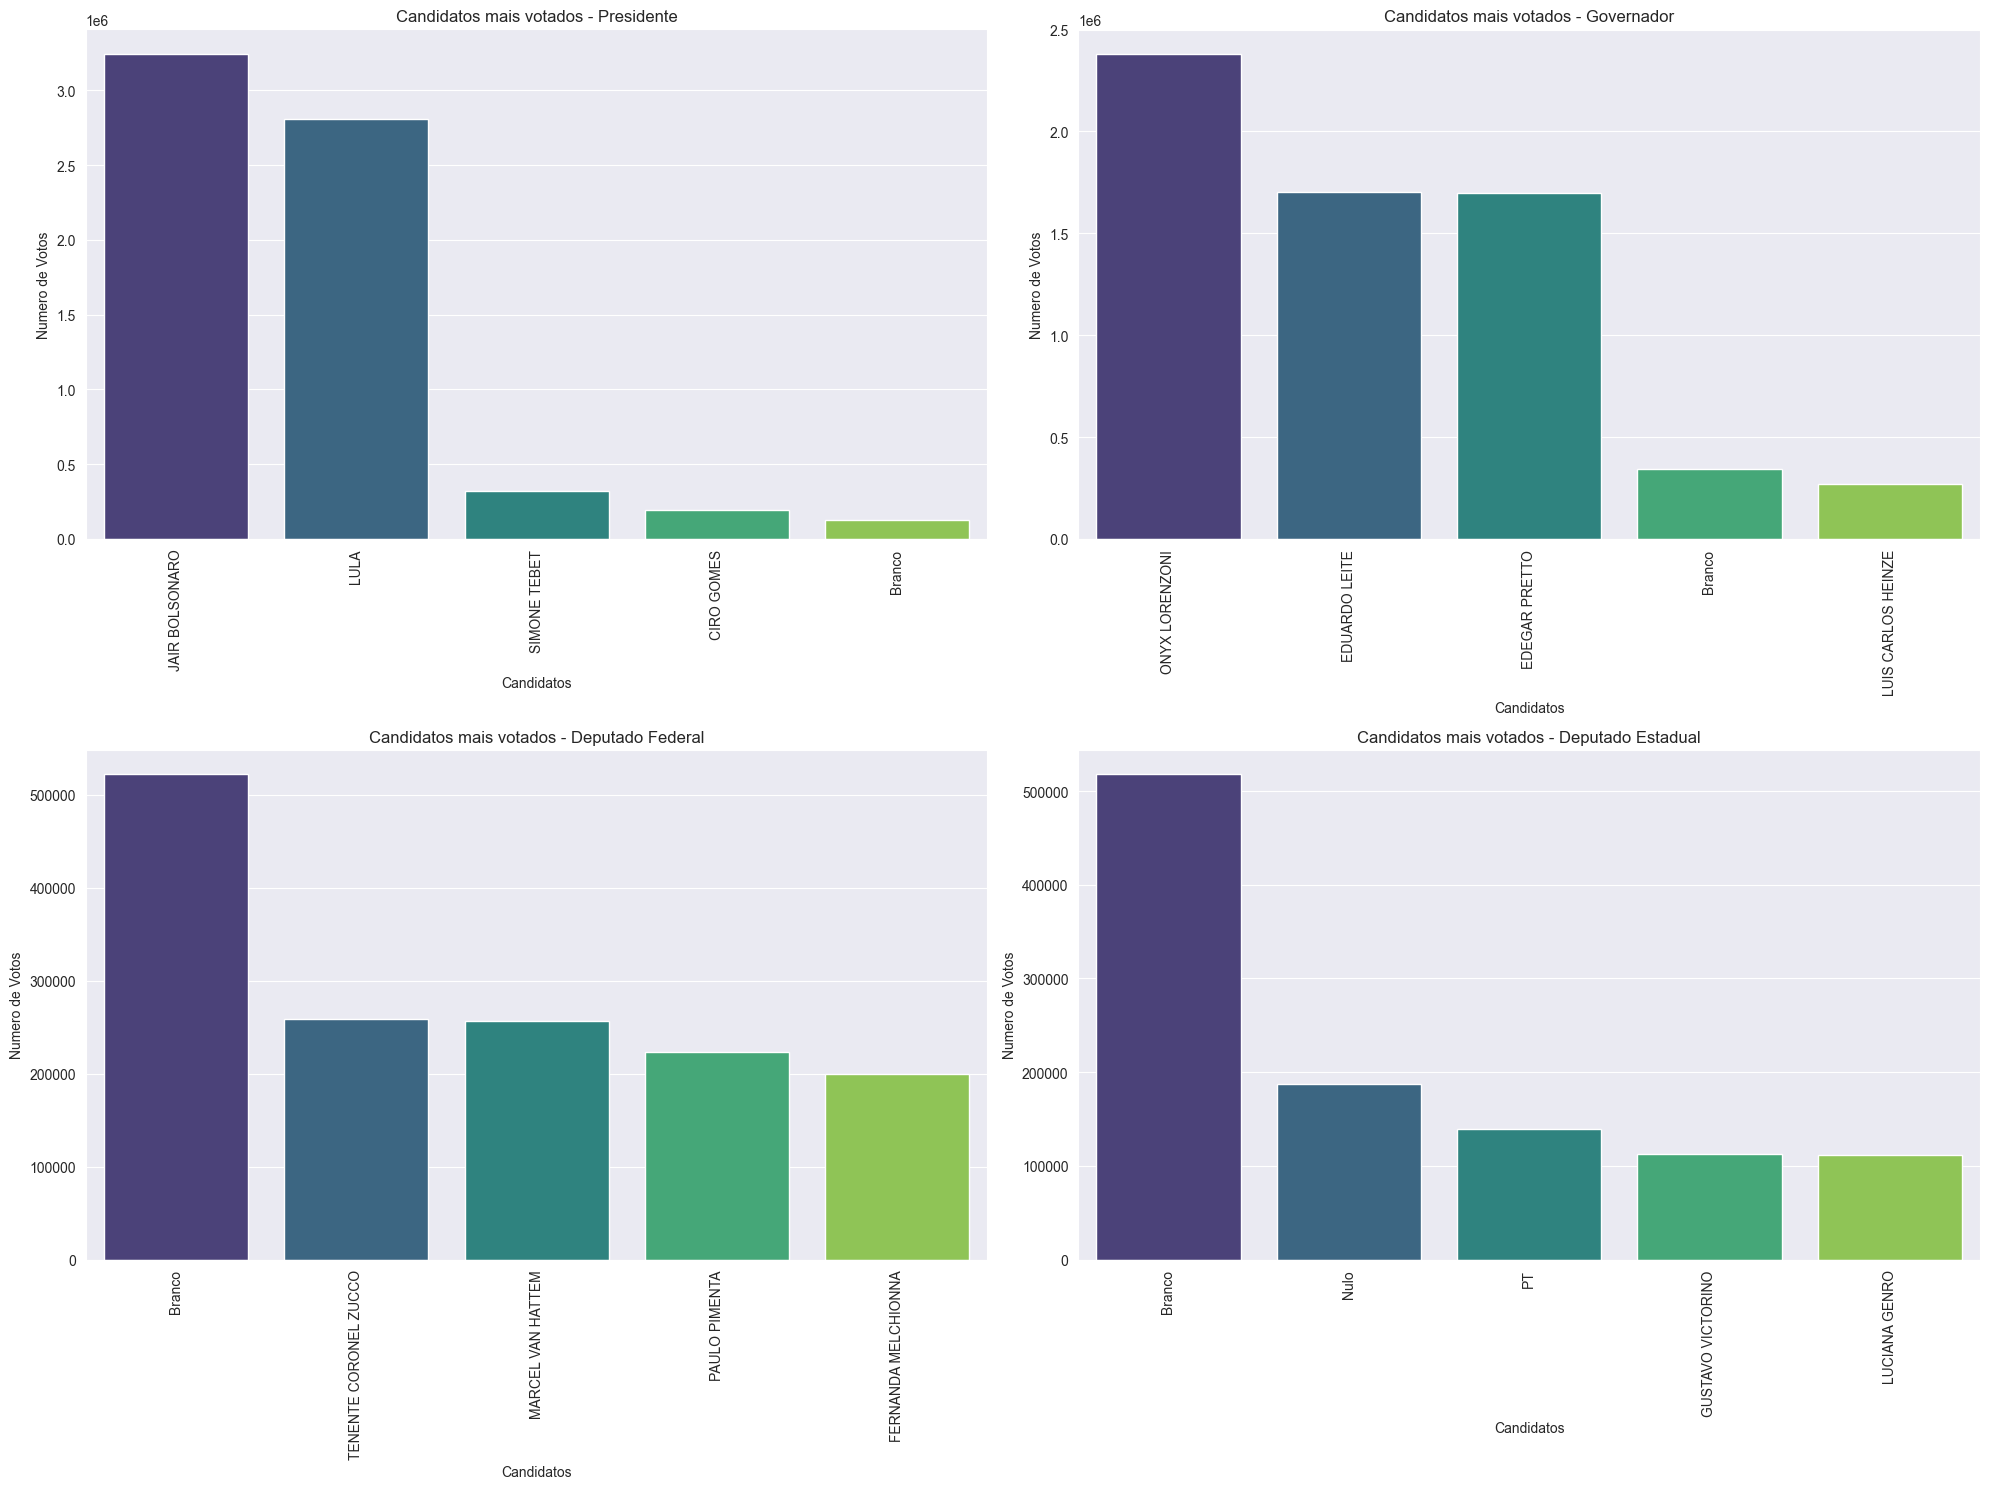

In [312]:
cargos_plot = ['Presidente', 'Governador', 'Deputado Federal', 'Deputado Estadual']

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

axes = axes.flatten()

for i, cargo in enumerate(cargos_plot):
    data = top_10_votos_por_cargo[cargo]
    labels = data['NM_VOTAVEL']
    sizes = data['QT_VOTOS']
    
    sns.barplot(x=labels, y=sizes, palette='viridis', hue=labels, ax=axes[i])
    axes[i].set_title(f'Candidatos mais votados - {cargo}')
    axes[i].set_xlabel('Candidatos')
    axes[i].set_ylabel('Numero de Votos')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Municipios com mais votos brancos e nulos

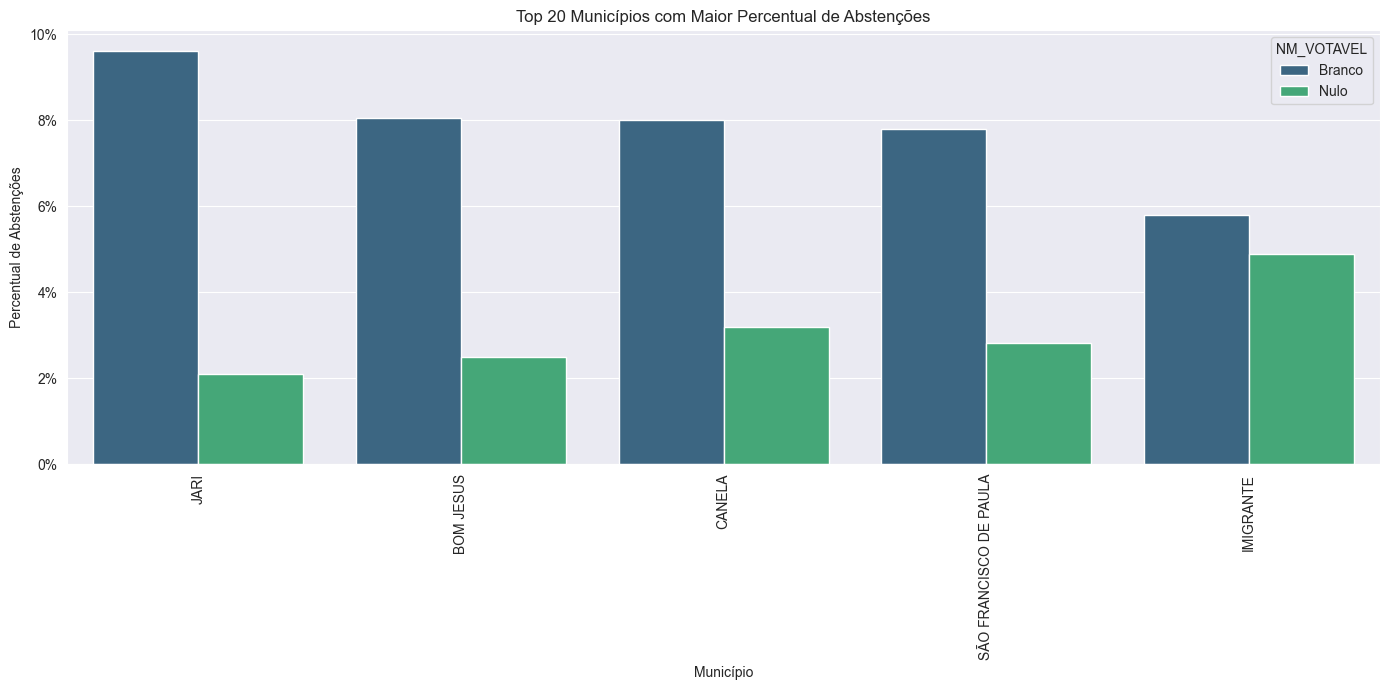

In [313]:
abstencoes_df = resultados[resultados['NM_VOTAVEL'].isin(['Branco', 'Nulo'])]

abstencoes_por_municipio = abstencoes_df.groupby(['NM_MUNICIPIO', 'NM_VOTAVEL'])[['QT_APTOS', 'QT_VOTOS']].sum().reset_index()

abstencoes_por_municipio['PCT_BRANCOS_NULOS'] = abstencoes_por_municipio['QT_VOTOS'] / abstencoes_por_municipio['QT_APTOS']

abstencoes_por_municipio = abstencoes_por_municipio.sort_values(by='PCT_BRANCOS_NULOS', ascending=False)

top_5_cities = abstencoes_por_municipio.groupby('NM_MUNICIPIO')['PCT_BRANCOS_NULOS'].sum().nlargest(5).index

top_5_abstencoes = abstencoes_por_municipio[abstencoes_por_municipio['NM_MUNICIPIO'].isin(top_5_cities)]

abstencoes_por_municipio.head()


plt.figure(figsize=(14, 7))
sns.barplot(x='NM_MUNICIPIO', y='PCT_BRANCOS_NULOS', data=top_5_abstencoes, palette='viridis', hue = 'NM_VOTAVEL') 
plt.title('Top 20 Municípios com Maior Percentual de Abstenções')
plt.xlabel('Município')
plt.ylabel('Percentual de Abstenções')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

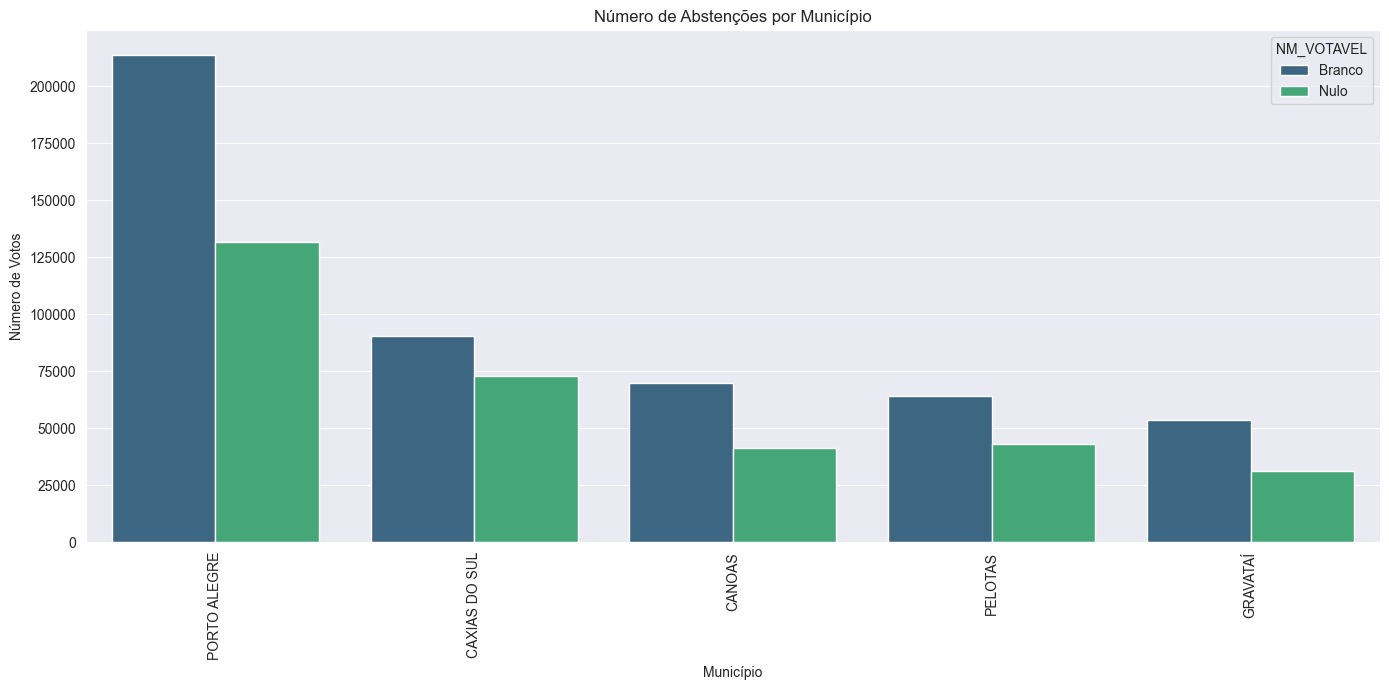

In [314]:
abstencoes_df = resultados[resultados['NM_VOTAVEL'].isin(['Branco', 'Nulo'])]

abstencoes_por_municipio = abstencoes_df.groupby(['NM_MUNICIPIO', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

abstencoes_por_municipio = abstencoes_por_municipio.sort_values(by='QT_VOTOS', ascending=False)

top_5_cities = abstencoes_por_municipio.groupby('NM_MUNICIPIO')['QT_VOTOS'].sum().nlargest(5).index

top_5_abstencoes = abstencoes_por_municipio[abstencoes_por_municipio['NM_MUNICIPIO'].isin(top_5_cities)]

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x='NM_MUNICIPIO', y='QT_VOTOS', hue='NM_VOTAVEL', data=top_5_abstencoes, palette='viridis')
plt.title('Número de Abstenções por Município')
plt.xlabel('Município')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Partidos com mais votos (Deputado Federal e Estadual)

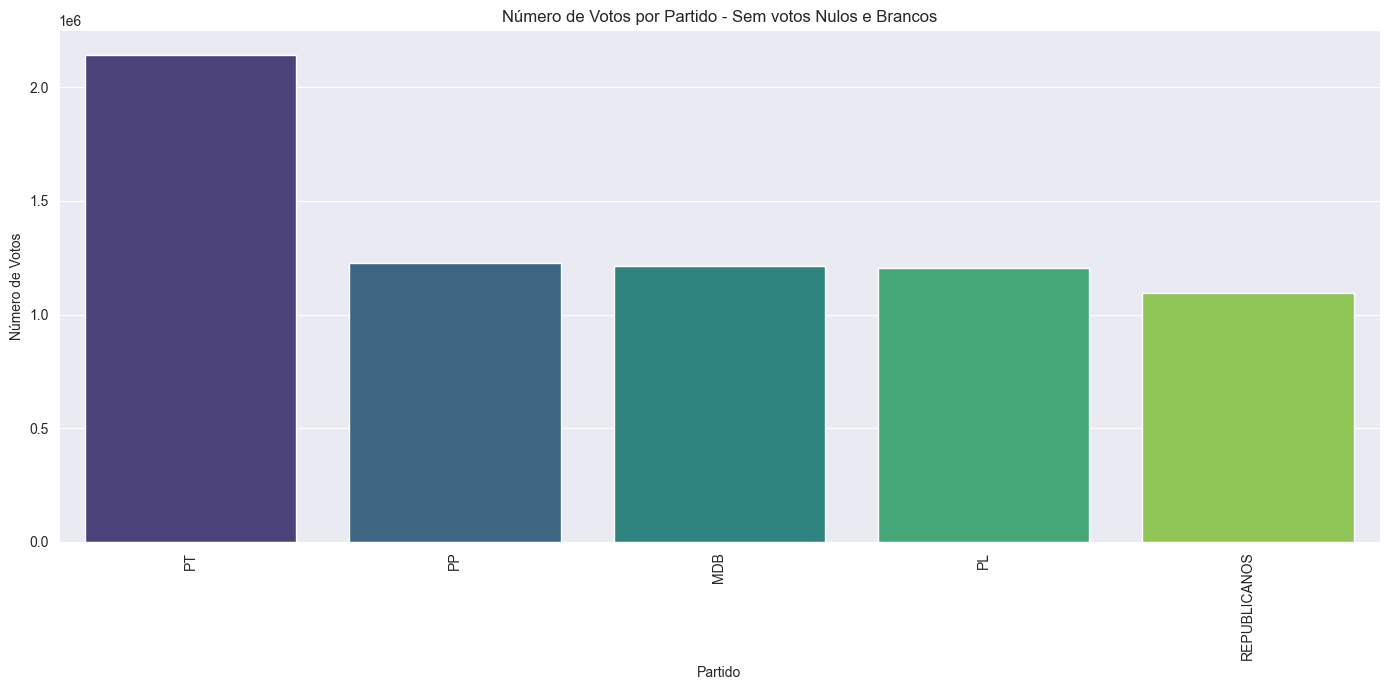

In [315]:
partidos = [partido for partido in resultados['SG_PARTIDO'].unique() if partido != '#NULO#']


votos_deputados = resultados[resultados['DS_CARGO_PERGUNTA'].isin(['Deputado Federal', 'Deputado Estadual'])].query('SG_PARTIDO in @partidos')


votos_por_partido = votos_deputados.groupby(['NR_TURNO', 'CD_ELEICAO', 'SG_PARTIDO'])['QT_VOTOS'].sum().reset_index().sort_values(by='QT_VOTOS', ascending=False)

top_5_partidos = votos_por_partido.groupby('SG_PARTIDO')['QT_VOTOS'].sum().nlargest(5).index

top_5_votos_partidos = votos_por_partido[votos_por_partido['SG_PARTIDO'].isin(top_5_partidos)]


plt.figure(figsize=(14, 7))
sns.barplot(x='SG_PARTIDO', y='QT_VOTOS', hue='SG_PARTIDO', data=top_5_votos_partidos, palette='viridis')

plt.title('Número de Votos por Partido - Sem votos Nulos e Brancos')
plt.xlabel('Partido')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Quantidade de votos por partido em diferentes estados

In [316]:
votos_por_estado_partido = resultados[['SG_UF', 'SG_PARTIDO', 'QT_VOTOS']]

votos_por_estado_partido = votos_por_estado_partido.groupby(['SG_UF', 'SG_PARTIDO'])['QT_VOTOS'].sum().reset_index()

partido_mais_votado_por_estado = votos_por_estado_partido.loc[votos_por_estado_partido.groupby('SG_UF')['QT_VOTOS'].idxmax()]

partido_mais_votado_por_estado.head()

,SG_UF,SG_PARTIDO,QT_VOTOS
22,RS,PT,8875737


### Municípios com maior porcentagem de abstenção

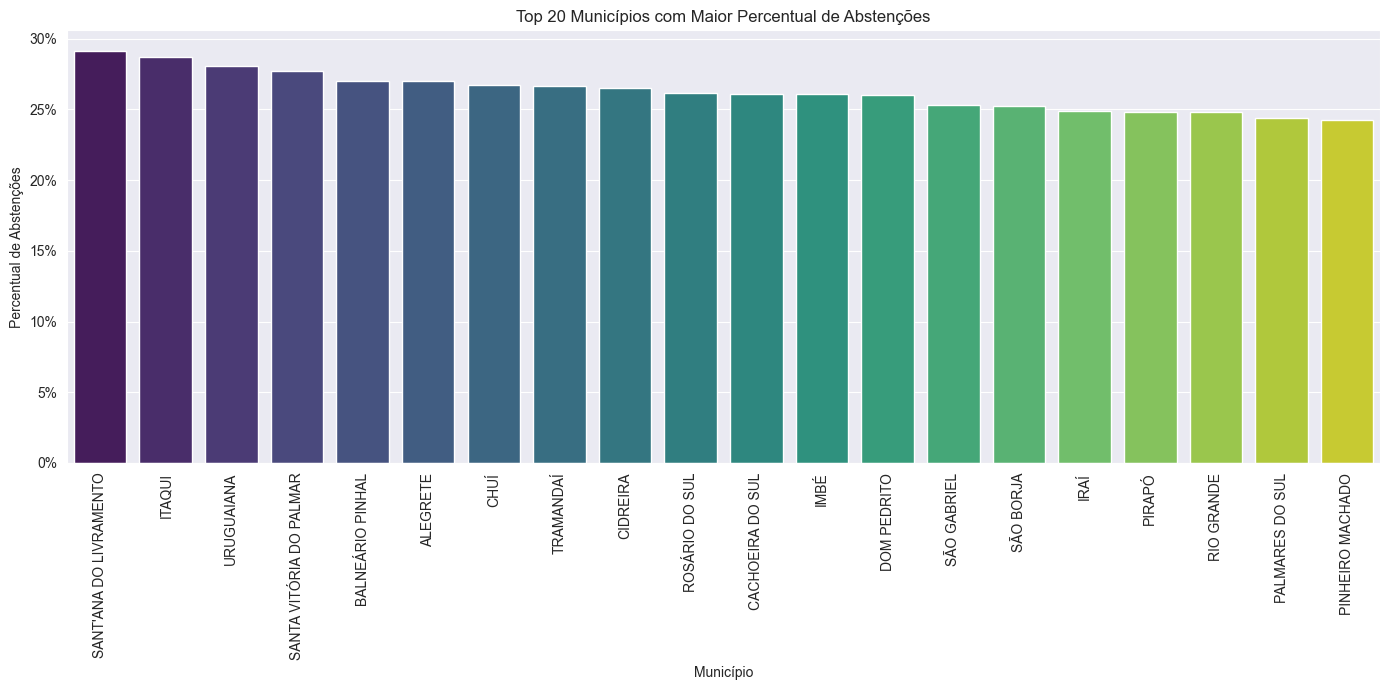

In [317]:

grouped_df = resultados.groupby(['NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO'])[['QT_APTOS', 'QT_ABSTENCOES']].sum().reset_index()

# Calculate the percentage of non-votables
grouped_df['PCT_ABSTENCOES'] = grouped_df['QT_ABSTENCOES'] / grouped_df['QT_APTOS']

# Group by municipality and calculate the mean percentage of non-votables
abstencoes_por_municipio = grouped_df.groupby('NM_MUNICIPIO')['PCT_ABSTENCOES'].mean().reset_index()

# Sort the data to get the municipalities with the highest percentage of non-votables
top_abstencoes_municipios = abstencoes_por_municipio.sort_values(by='PCT_ABSTENCOES', ascending=False).head(20)


# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x='NM_MUNICIPIO', y='PCT_ABSTENCOES', data=top_abstencoes_municipios, palette='viridis', hue = 'NM_MUNICIPIO')  
plt.title('Top 20 Municípios com Maior Percentual de Abstenções')
plt.xlabel('Município')
plt.ylabel('Percentual de Abstenções')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Despesas

In [ ]:
top_despesas_contratadas_df = despesas_contratadas_df['DS_ORIGEM_DESPESA'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_despesas_contratadas_df.values, y=top_despesas_contratadas_df.index, palette='coolwarm')

plt.title('Despesas Contratadas', fontsize=14)
plt.xlabel('Valor Pago (R$)', fontsize=12)
plt.ylabel('Descrição da Despesa', fontsize=12)

plt.tight_layout()
plt.show()


#### Maiores despesas pagas por campanha

In [ ]:
top_despesas_pagas_df = despesas_pagas_df['DS_ORIGEM_DESPESA'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_despesas_pagas_df.values, y=top_despesas_pagas_df.index, palette='viridis')

plt.title('Despesas Pagas', fontsize=14)
plt.xlabel('Valor Pago (R$)', fontsize=12)
plt.ylabel('Descrição da Despesa', fontsize=12)

plt.tight_layout()
plt.show()

#### Meios de pagamento mais utilizados

In [ ]:
top_despesas_pagas_df = despesas_pagas_df['DS_ESPECIE_RECURSO'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_despesas_pagas_df.values, y=top_despesas_pagas_df.index, palette='magma')

plt.title('Meios de pagamento mais utilizados', fontsize=14)
plt.ylabel('Meios de pagamento', fontsize=12)
plt.xlabel('Número de utilizações', fontsize=12)

plt.tight_layout()
plt.show()

#### Partidos com maiores despesas contratadas

In [ ]:
partidos_despesas_df = despesas_contratadas_df.copy()

partidos_despesas_df['VR_DESPESA_CONTRATADA'] = partidos_despesas_df['VR_DESPESA_CONTRATADA'].str.replace('.', '', regex=False)  # Remove pontos
partidos_despesas_df['VR_DESPESA_CONTRATADA'] = partidos_despesas_df['VR_DESPESA_CONTRATADA'].str.replace(',', '.', regex=False)  # Substitui vírgula decimal por ponto
partidos_despesas_df['VR_DESPESA_CONTRATADA'] = pd.to_numeric(partidos_despesas_df['VR_DESPESA_CONTRATADA'], errors='coerce')

partidos_despesas_df = partidos_despesas_df.groupby('SG_PARTIDO')['VR_DESPESA_CONTRATADA'].sum().reset_index()
partidos_despesas_df = partidos_despesas_df.sort_values(by='VR_DESPESA_CONTRATADA', ascending=True)

partidos_despesas_df['VR_DESPESA_CONTRATADA'] = partidos_despesas_df['VR_DESPESA_CONTRATADA'] / 1e6
partidos_despesas_df['VR_DESPESA_CONTRATADA'] = partidos_despesas_df['VR_DESPESA_CONTRATADA'].map('{:,.2f}'.format)

plt.figure(figsize=(10, 6)) 
plt.bar(partidos_despesas_df['SG_PARTIDO'], partidos_despesas_df['VR_DESPESA_CONTRATADA'].astype(float), color='skyblue')
plt.title('Despesas Contratadas por Partido - Eleições 2022')
plt.xlabel('Partido')
plt.ylabel('Valor das Despesas Contratadas (R$ milhões)')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()
